In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re
from wordcloud import WordCloud
from PIL import Image
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [41]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [42]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\공공데이터포털\한국공예디자인문화진흥원_KCDF갤러리 전시정보\*')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\한국공예디자인문화진흥원_KCDF갤러리 전시정보\\한국공예디자인문화진흥원_KCDF갤러리 전시정보_20220502.csv']

In [43]:
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,전시명,전시시작일,전시완료일,전시관,전시작가단체명
0,11회 옻빛전,2017-11-29,2017-12-05,KCDF 갤러리 : 1전시관,옻빛회
1,"108 베 - 한국의 베, 삼베",2016-09-21,2016-09-27,KCDF 갤러리 : 1전시관,작가
2,"2017 색, 그리고 이야기",2017-07-05,2017-07-11,KCDF 갤러리 : 2전시관,한국천연염색작가협회
3,2018 북악도예가회전 ‘One of a Kind’,2018-11-14,2018-11-20,KCDF 갤러리 : 2전시관,북악도예가회
4,2019년 색색인화(色色人花)展,2019-10-16,2019-10-22,KCDF 갤러리 : 2전시관,원광디지털대학교 한국복식과학학과


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   전시명      38 non-null     object
 1   전시시작일    38 non-null     object
 2   전시완료일    38 non-null     object
 3   전시관      38 non-null     object
 4   전시작가단체명  38 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


In [45]:
df.describe()

,전시명,전시시작일,전시완료일,전시관,전시작가단체명
count,38,38,38,38,38
unique,37,32,32,3,37
top,KCDF 공모전시(단체) 2,2017-08-30,2017-09-05,KCDF 갤러리 : 2전시관,KCDF
freq,2,3,3,14,2


In [46]:
def convert_month(x):
    return datetime.strptime(x,'%Y-%m-%d').month
def convert_weekday(x):
    return datetime.strptime(x,'%Y-%m-%d').weekday()
def convert_period(df):
    start_date = datetime.strptime(df['전시시작일'],'%Y-%m-%d')
    end_date = datetime.strptime(df['전시완료일'],'%Y-%m-%d')
    return (end_date-start_date).days
df['시작월'] = df['전시시작일'].apply(convert_month)
df['시작요일'] = df['전시시작일'].apply(convert_weekday)
df['완료월'] = df['전시완료일'].apply(convert_month)
df['완료요일'] = df['전시완료일'].apply(convert_weekday)
df['전시기간'] = df.apply(convert_period,axis=1)

In [51]:
df.describe()

,시작월,시작요일,완료월,완료요일,전시기간
count,38.000000,38.0,38.000000,38.0,38.0
mean,6.921053,2.0,7.210526,1.0,6.0
std,3.096481,0.0,3.146494,0.0,0.0
min,1.000000,2.0,1.000000,1.0,6.0
25%,5.250000,2.0,5.250000,1.0,6.0
50%,8.000000,2.0,8.000000,1.0,6.0
75%,8.000000,2.0,9.000000,1.0,6.0
max,11.000000,2.0,12.000000,1.0,6.0


In [47]:
df.head()

,전시명,전시시작일,전시완료일,전시관,전시작가단체명,시작월,시작요일,완료월,완료요일,전시기간
0,11회 옻빛전,2017-11-29,2017-12-05,KCDF 갤러리 : 1전시관,옻빛회,11,2,12,1,6
1,"108 베 - 한국의 베, 삼베",2016-09-21,2016-09-27,KCDF 갤러리 : 1전시관,작가,9,2,9,1,6
2,"2017 색, 그리고 이야기",2017-07-05,2017-07-11,KCDF 갤러리 : 2전시관,한국천연염색작가협회,7,2,7,1,6
3,2018 북악도예가회전 ‘One of a Kind’,2018-11-14,2018-11-20,KCDF 갤러리 : 2전시관,북악도예가회,11,2,11,1,6
4,2019년 색색인화(色色人花)展,2019-10-16,2019-10-22,KCDF 갤러리 : 2전시관,원광디지털대학교 한국복식과학학과,10,2,10,1,6


## 시각화

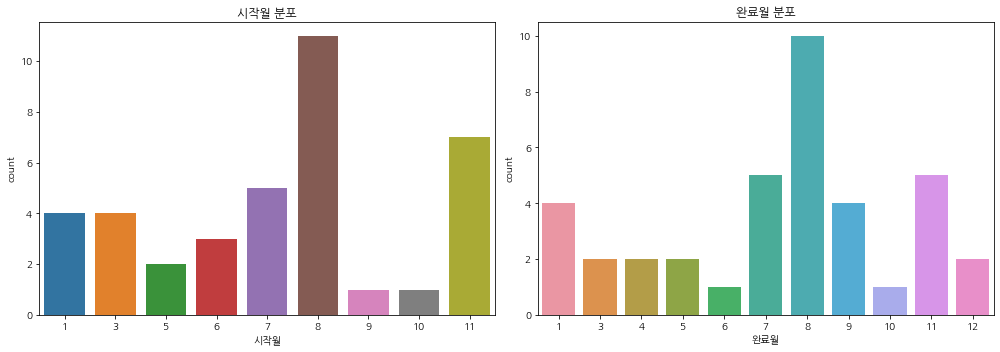

In [48]:
sub_df1 = df.groupby('시작월',as_index=False)['전시명'].count()
sub_df2 = df.groupby('완료월',as_index=False)['전시명'].count()
fig,axes = plt.subplots(1,2,figsize=(14,5))
sns.barplot(data=sub_df1,x='시작월',y='전시명',ax=axes[0]).set(title='시작월 분포',ylabel='count')
sns.barplot(data=sub_df2,x='완료월',y='전시명',ax=axes[1]).set(title='완료월 분포',ylabel='count')
plt.tight_layout()

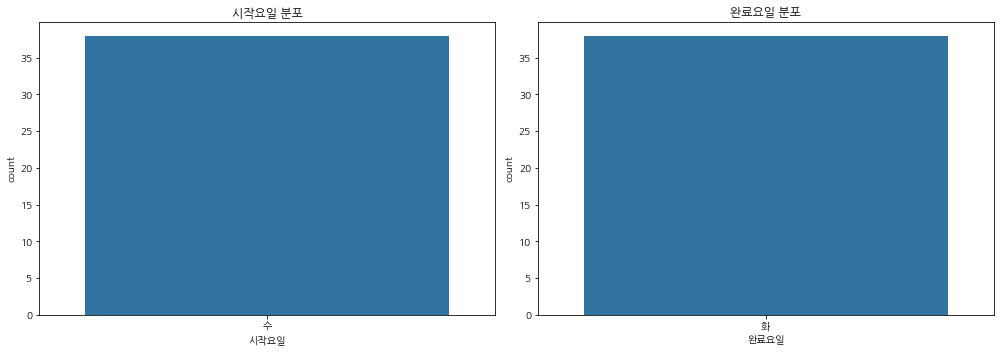

In [76]:
sub_df1 = df.groupby('시작요일',as_index=False)['전시명'].count()
sub_df2 = df.groupby('완료요일',as_index=False)['전시명'].count()
weekday_dict = {0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}
fig,axes = plt.subplots(1,2,figsize=(14,5))
sns.barplot(data=sub_df1,x='시작요일',y='전시명',ax=axes[0]).set(title='시작요일 분포',ylabel='count')
sns.barplot(data=sub_df2,x='완료요일',y='전시명',ax=axes[1]).set(title='완료요일 분포',ylabel='count')

axes[0].set_xticklabels([weekday_dict[int(i.get_text())] for i in axes[0].get_xticklabels()])
axes[1].set_xticklabels([weekday_dict[int(i.get_text())] for i in axes[1].get_xticklabels()])
plt.tight_layout()

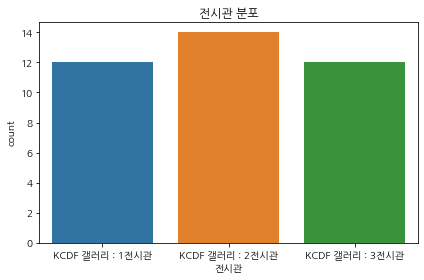

In [79]:
sub_df = df.groupby('전시관',as_index=False)['전시명'].count()
plt.figure(figsize=(6,4))
sns.barplot(data=sub_df,x='전시관',y='전시명').set(title='전시관 분포',ylabel='count')
plt.tight_layout()

In [87]:
sub_df['전시관'].unique()

array(['KCDF 갤러리 : 1전시관', 'KCDF 갤러리 : 2전시관', 'KCDF 갤러리 : 3전시관'],
      dtype=object)

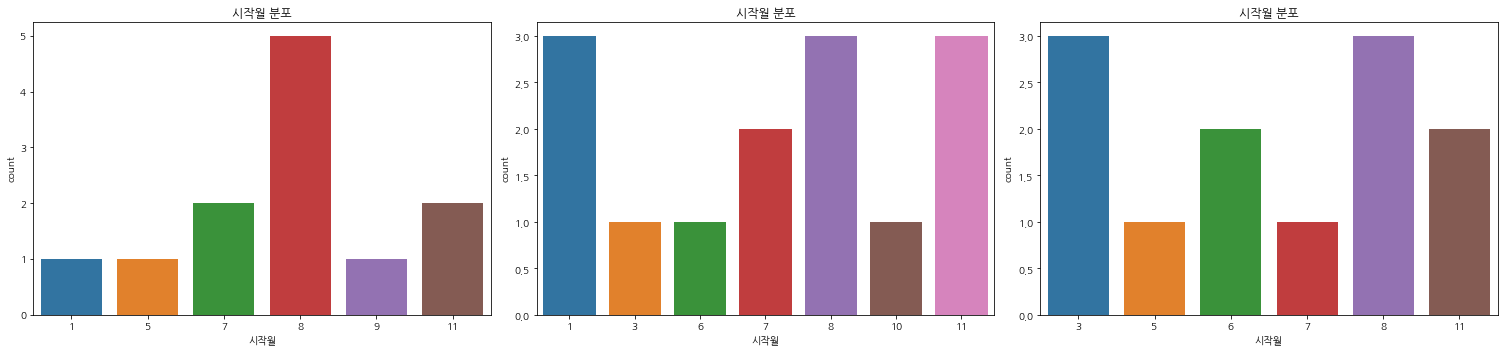

In [92]:
sub_df = df.groupby(['전시관','시작월'],as_index=False)['전시명'].count()
fig,axes = plt.subplots(1,3,figsize=(21,5))
for i,c in enumerate(sub_df['전시관'].unique()):
    sns.barplot(data=sub_df[sub_df['전시관']==c],x='시작월',y='전시명',ax=axes[i]).set(title='시작월 분포',ylabel='count')
plt.tight_layout()